In [13]:
import os
import pandas as pd

from datasets import load_dataset

# 1.6 Million messages LoL reports ~2014

Correlation with report reasons and count of reports, timestamps of reports to see when they happen, analyze enemy reports vs team reports to see how these differ, some text analysis to see what classifies between the report reasons. How accurate are the reports? Are they based on who is reporting them?

https://www.kaggle.com/datasets/simshengxue/league-of-legends-tribunal-chatlogs

Notable features:
- Reports per player and by team
- Report reasons
- Game time
- Message association to reported player

In [123]:
toxicity = pd.read_csv('data/chatlogs.csv')
toxicity

,Unnamed: 0,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,chatlog_id,champion_name
0,0,gold 2 zed,enemy,00:00:21,8,0,2,Negative Attitude,1,Udyr
1,1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,1,Riven
2,2,nice premade lie :o,enemy,00:00:27,8,0,2,Negative Attitude,1,Udyr
3,3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,1,Riven
4,4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,1,Udyr
...,...,...,...,...,...,...,...,...,...,...
1697217,1697217,gg,offender,00:28:23,10,0,3,Offensive Language,9999,Kassadin
1697218,1697218,gg,enemy,00:28:26,10,0,3,Offensive Language,9999,Lee Sin
1697219,1697219,gg,enemy,00:28:27,10,0,3,Offensive Language,9999,Nami
1697220,1697220,gg,enemy,00:28:28,10,0,3,Offensive Language,9999,Ezreal


In [3]:
toxicity['most_common_report_reason'].value_counts()

most_common_report_reason
Verbal Abuse            570122
Negative Attitude       482139
Offensive Language      420474
Assisting Enemy Team    191461
Spamming                 28341
Inappropriate Name        4685
Name: count, dtype: int64

Negative Attitude 482139
Offensive Language 420474
Assisting Enemy Team 191461
Verbal Abuse 570122
Spamming 28341
Inappropriate Name 4685


<Axes: title={'center': 'Most Common Report Reasons'}, ylabel='count'>

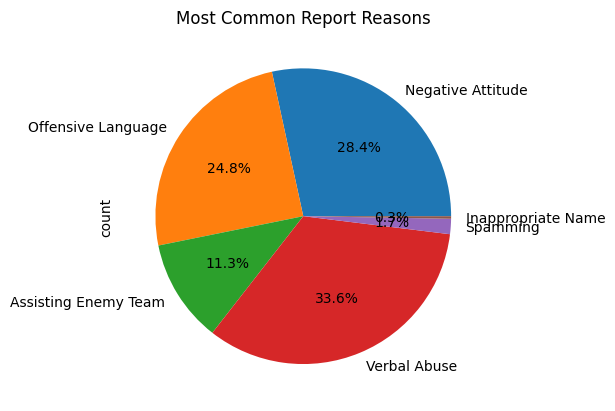

In [4]:
report_reasons = toxicity['most_common_report_reason'].unique()
count = []
for raised in report_reasons:
    count.append(toxicity['most_common_report_reason'].value_counts()[raised])
    print(raised, count[-1])
pd.DataFrame({'reason': report_reasons, 'count': count}).plot.pie(y='count', labels=report_reasons, autopct='%1.1f%%', legend=False, title='Most Common Report Reasons')


# 100K Twitter Posts

User behavior or trend analysis of tweets? What topics are covered? What days or times get the most tweets? What times get specific kinds of tweets? Some kind of text analysis that we havent learned yet? What patterns can we see with posts with higher Klout scores? What can data tell us about engaging twitter posts?

https://www.kaggle.com/datasets/thedevastator/tweets-and-user-engagement

Notable features:
- Weekday, day, and hour posted.
- Metadata like retweets, likes, and sentiment
- Unique Klout value (more info in dataset description)
- Location

In [ ]:
twitter = pd.read_csv('data/Twitterdatainsheets.csv')
twitter.head()

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_1276/3563881971.py:1: DtypeWarning: Columns (3,4,5,6,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter = pd.read_csv('Twitterdatainsheets.csv')


,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669


In [61]:
keep = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
twitter = twitter[twitter[' Weekday'].isin(keep)]
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          100000 non-null  int64  
 1   TweetID        100000 non-null  object 
 2    Weekday       100000 non-null  object 
 3    Hour          100000 non-null  object 
 4    Day           100000 non-null  object 
 5    Lang          100000 non-null  object 
 6    IsReshare     100000 non-null  object 
 7    Reach         100000 non-null  float64
 8    RetweetCount  100000 non-null  float64
 9    Likes         100000 non-null  float64
 10   Klout         100000 non-null  float64
 11   Sentiment     100000 non-null  float64
 12   text          100000 non-null  object 
 13   LocationID    100000 non-null  float64
 14   UserID        100000 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 12.2+ MB


In [62]:
twitter[' Weekday'].value_counts()

 Weekday
Tuesday      18468
Thursday     18458
Wednesday    18236
Monday       15420
Friday       15004
Saturday      7421
Sunday        6993
Name: count, dtype: int64

In [57]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206295 entries, 0 to 206294
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          206295 non-null  int64  
 1   TweetID        206291 non-null  object 
 2    Weekday       206292 non-null  object 
 3    Hour          106175 non-null  object 
 4    Day           106181 non-null  object 
 5    Lang          106133 non-null  object 
 6    IsReshare     100000 non-null  object 
 7    Reach         100000 non-null  float64
 8    RetweetCount  100000 non-null  float64
 9    Likes         100000 non-null  float64
 10   Klout         100000 non-null  float64
 11   Sentiment     100000 non-null  float64
 12   text          100000 non-null  object 
 13   LocationID    100000 non-null  float64
 14   UserID        100000 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 23.6+ MB


<Axes: title={'center': 'Tweets by Weekday'}, ylabel='count'>

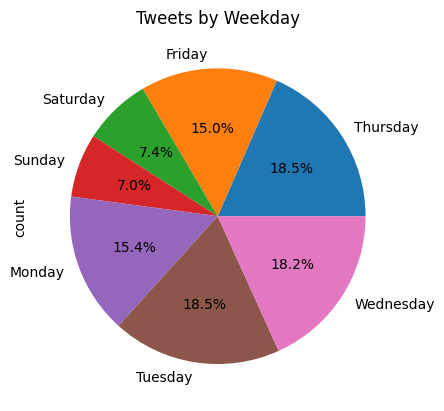

In [74]:
weekdaylist = twitter[' Weekday'].unique().tolist()
weekdaycount = []
for day in weekdaylist:
    weekdaycount.append(twitter[' Weekday'].value_counts()[day])
pd.DataFrame({'day': weekdaylist, 'count': weekdaycount}).plot.pie(y='count', labels=weekdaylist, autopct='%1.1f%%', legend=False, title='Tweets by Weekday')

# Youtube Trending Videos Dataset

~48k unique data points on trending videos in the United States. Total of ~268K entries for repeated trending videos (different points in time). Included are title, views, likes, dislikes, comments, post date, etc. Taken from August 2020 to April 2024

https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv

Notable Features:
- Associated channels to video posted
- Date posted and when it trended
- Metadata like views, likes, dislikes, comments, and tags
- Multiple copies of videos for different trending periods

In [ ]:
yttrending = pd.read_csv('data/US_youtube_trending_data.csv')
yttrending.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [108]:
yttrending['publishedAt'] = pd.to_datetime(yttrending['publishedAt'])
yttrending['trending_date'] = pd.to_datetime(yttrending['trending_date'])

<Axes: title={'center': 'Videos Published by Hour of Day'}, xlabel='Hour of Day', ylabel='Number of Videos'>

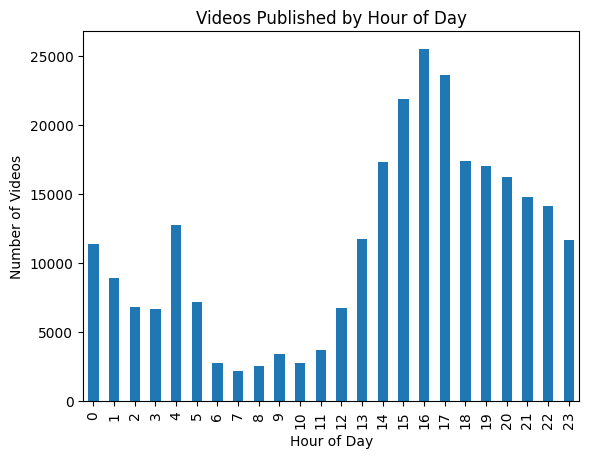

In [113]:
yttrending['publishedAt'].dt.hour.value_counts().sort_index().plot(kind='bar', title='Videos Published by Hour of Day', xlabel='Hour of Day', ylabel='Number of Videos')

Duplicates for multiple trending periods!

In [116]:
yttrending.sort_values(by='view_count', ascending=False)[['title', 'view_count']].head(10)

,title,view_count
266187,Discord Loot Boxes are here.,1407643634
266388,Discord Loot Boxes are here.,1406329649
265987,Discord Loot Boxes are here.,628718636
152788,BLACKPINK - ‘Pink Venom’ M/V,277791741
152568,BLACKPINK - ‘Pink Venom’ M/V,273162966
152365,BLACKPINK - ‘Pink Venom’ M/V,268758295
152175,BLACKPINK - ‘Pink Venom’ M/V,264459017
56374,BTS (방탄소년단) 'Butter' Official MV,264407389
151968,BLACKPINK - ‘Pink Venom’ M/V,260126694
151773,BLACKPINK - ‘Pink Venom’ M/V,255524865


In [115]:
yttrending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           268787 non-null  object             
 1   title              268787 non-null  object             
 2   publishedAt        268787 non-null  datetime64[ns, UTC]
 3   channelId          268787 non-null  object             
 4   channelTitle       268787 non-null  object             
 5   categoryId         268787 non-null  int64              
 6   trending_date      268787 non-null  datetime64[ns, UTC]
 7   tags               268787 non-null  object             
 8   view_count         268787 non-null  int64              
 9   likes              268787 non-null  int64              
 10  dislikes           268787 non-null  int64              
 11  comment_count      268787 non-null  int64              
 12  thumbnail_link     268787 non-

# Twitter Misinformation Dataset (100k text tweets)
This is a twitter misinformation dataset consisting of 100k news tweets labeled as:
0 - truth
1 - misinformation

It is all text, there is no other metadata. What can be done are text-based Factual vs Misinformation analysis. What keywords are associated with either classification? Word counts? Sentiment analysis between both? What topics tend to include misinformation?

look here for more information -> https://huggingface.co/datasets/roupenminassian/twitter-misinformation

Notable Features:
- It is just text and its label of misinformation.

In [19]:
ds = load_dataset("roupenminassian/twitter-misinformation")
twitmisinfo = pd.concat([ds['train'].to_pandas(), ds['test'].to_pandas()])

In [20]:
twitmisinfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102661 entries, 0 to 10266
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0.1  102661 non-null  int64 
 1   Unnamed: 0    102661 non-null  int64 
 2   text          102661 non-null  object
 3   label         102661 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.9+ MB


# Steam Reviews Dataset (~765K reduced)

Ideas: Analyze gaming trends with genres or reviews to playercounts etc. Look at reviews per game. How do reviews impact the popularity of a game? Do player reviews reflect critic reviews? What do players want? What do players enjoy? How does playtime correlate with sentiment? What keywords do users use when expressing a positive vs negative sentiment? Analyze polarized games. Look at review bombs? (Huge spikes in reviews). Pair this dataset with another to enrich the data included.

https://www.gigasheet.com/sample-data/steam-game-reviews

Associated games dataset: https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings

Can possibly combine with some metacritic/game review database to also see overall game sentiment too. Probably will need some cleaning.

Features:
- Time stamps for reviews
- Review text
- Metadeta like hours_played, helpful, funny counts are included
- Game name is included and can be used to find other metadata about the game in specific.

In [48]:
steamreviews = pd.read_csv('data/Steam Game Reviews export 2025-09-03 01-50-49.csv')
steamreviews.head()

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [49]:
steamreviews['game_name'].nunique()

242

Some cleaning

In [50]:
steamreviews = steamreviews.dropna(subset=['review'])
steamreviews['date'] = pd.to_datetime(steamreviews['date'], errors='coerce')
steamreviews.head()

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_49856/2784782791.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  steamreviews['date'] = pd.to_datetime(steamreviews['date'], errors='coerce')


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,NaT,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,NaT,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,NaT,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,NaT,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,NaT,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [ ]:
steamreviews[steamreviews['date'].isna()]['game_name'].nunique() # ALL games have missing dates, so lets just remove the rows with missing dates

242

<Axes: title={'center': 'Number of Steam Reviews Over Time'}, xlabel='Year', ylabel='Number of Reviews'>

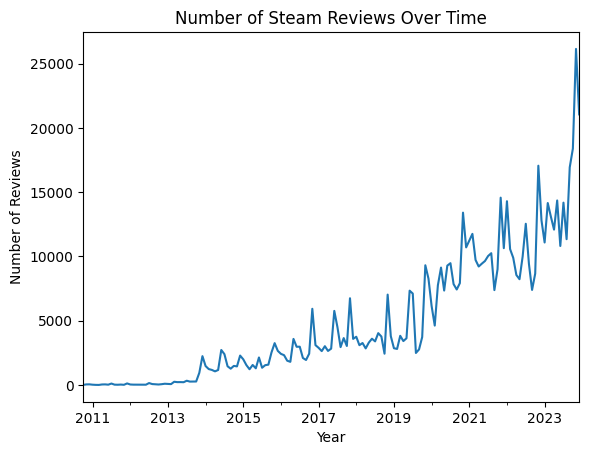

In [57]:
steamreviewsnonan = steamreviews.dropna(subset=['date'])
monthly_counts = steamreviewsnonan.groupby(steamreviewsnonan['date'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()
monthly_counts.plot(kind='line', title='Number of Steam Reviews Over Time', xlabel='Year', ylabel='Number of Reviews')
    

In [46]:
steamreviewsnonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765098 entries, 6769 to 992152
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   review          765098 non-null  object        
 1   hours_played    765098 non-null  float64       
 2   helpful         765098 non-null  int64         
 3   funny           765098 non-null  int64         
 4   recommendation  765098 non-null  object        
 5   date            765098 non-null  datetime64[ns]
 6   game_name       765098 non-null  object        
 7   username        765032 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 52.5+ MB
